In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

# gensim magic
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# for PCA
from sklearn.decomposition import PCA

In [2]:
def scatter_terms(term1,term2,model_name):
    terms = [term1,term2]
    model = eebo_models[model_name]
    tdata=dict()
    for t in terms:
        tdata[t] = dict()
        tdata[t]['response'] = model.most_similar(t,topn=25)
        tdata[t]['neighbor_list'] = list()
        tdata[t]['words'] = list()

        # add search term
        tdata[t]['words'].append(t)
        tdata[t]['neighbor_list'].append(model[t])

        for i in tdata[t]['response']:
            tdata[t]['words'].append(i[0])
            tdata[t]['neighbor_list'].append(model[i[0]])
            
    tdata_labels=list()
    tdata_neighbor_list=list()
    tdata_words=list()
    for t in sorted(tdata.keys()):
        tdata_labels.append(t)
        tdata_neighbor_list = tdata_neighbor_list + tdata[t]['neighbor_list']
        tdata_words = tdata_words + (tdata[t]['words'])
        
    pca = PCA(n_components=2)

    plot_data = pca.fit_transform(tdata_neighbor_list)
    fig = plt.figure(figsize=(20, 15))

    xs = plot_data[:, 0]
    ys = plot_data[:, 1]
    plt.clf()

    # plot first word in red
    plt.scatter(plot_data[:26, 0], plot_data[:26, 1], marker = 'o', c="red")

    # plot first word in blue
    plt.scatter(plot_data[27:, 0], plot_data[27:, 1], marker = 'o', c="blue")
    plt.title("terms: {0},{1} ({2})".format(term1,term2,model_name))
              
    for i, w in enumerate(tdata_words):
        plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),
        textcoords = 'offset points', ha = 'left', va = 'top')
    plt.show()

In [3]:
# load saved models
eebo_models = dict()
input_data = ["../models/eebo-1520-1529.w2v",
              "../models/eebo-1530-1539.w2v",
              "../models/eebo-1540-1549.w2v",
              "../models/eebo-1550-1559.w2v",
              "../models/eebo-1560-1569.w2v",
              "../models/eebo-1570-1579.w2v",
              "../models/eebo-1580-1589.w2v",
              "../models/eebo-1590-1599.w2v",
              "../models/eebo-1600-1609.w2v",
              "../models/eebo-1610-1619.w2v",
              "../models/eebo-1620-1629.w2v",
              "../models/eebo-1630-1639.w2v"]

for fp in input_data:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))
    eebo_models[model_name] = KeyedVectors.load(fp,mmap='r')

starting: eebo-1520-1529
starting: eebo-1530-1539
starting: eebo-1540-1549
starting: eebo-1550-1559
starting: eebo-1560-1569
starting: eebo-1570-1579
starting: eebo-1580-1589
starting: eebo-1590-1599
starting: eebo-1600-1609
starting: eebo-1610-1619
starting: eebo-1620-1629
starting: eebo-1630-1639


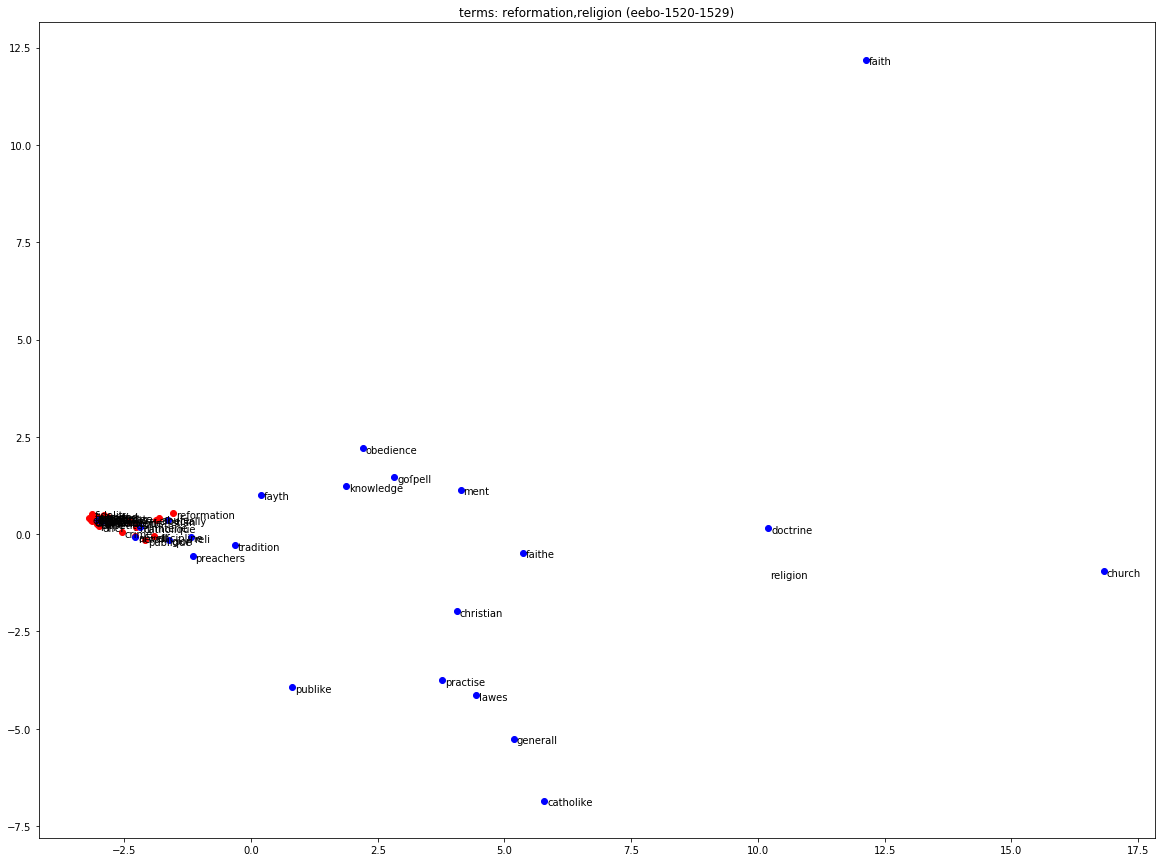

In [4]:
model_names = sorted(eebo_models.keys())
sample_terms = ["reformation","religion"]
interact(scatter_terms, 
         term1="reformation",
         term2="religion",
         model_name=model_names);